<a href="https://colab.research.google.com/github/Luizlff20/Gerenciador-de-estoque/blob/main/Prouni_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports e Carregamento do Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/pda-prouni-2017 - pda-prouni-2017.csv')
# Descrição Inicial do Conjunto de Dados:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236636 entries, 0 to 236635
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             236636 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           236636 non-null  int64 
 2   NOME_IES_BOLSA                  236636 non-null  object
 3   TIPO_BOLSA                      236636 non-null  object
 4   MODALIDADE_ENSINO_BOLSA         236636 non-null  object
 5   NOME_CURSO_BOLSA                236636 non-null  object
 6   NOME_TURNO_CURSO_BOLSA          236636 non-null  object
 7   CPF_BENEFICIARIO_BOLSA          236636 non-null  object
 8   SEXO_BENEFICIARIO_BOLSA         236636 non-null  object
 9   RACA_BENEFICIARIO_BOLSA         236636 non-null  object
 10  DT_NASCIMENTO_BENEFICIARIO      236636 non-null  object
 11  BENEFICIARIO_DEFICIENTE_FISICO  236636 non-null  object
 12  REGIAO_BENEFICIARIO_BOLSA     

Apresentação geral do conjunto de dados:

* Estamos pegando "ferramentas" (bibliotecas) que vamos precisar, como uma caixa de ferramentas para diferentes tipos de tarefas.
Carregamento do Dataset:

* Estamos pegando um arquivo de dados (um conjunto de informações) e colocando-o em uma "caixa" chamada data para que possamos usá-lo.
Descrição do Conjunto de Dados:

* Estamos olhando para dentro da "caixa" data para ver quantas coisas (variáveis) temos e quantas "linhas" de informações (observações) temos sobre essas coisas.

In [ ]:
# Tratamento de Dados Ausentes/Ruidosos:
# Identificação de dados ausentes
missing_data = data.isna().sum()
print(missing_data)

ANO_CONCESSAO_BOLSA               0
CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DT_NASCIMENTO_BENEFICIARIO        0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
SIGLA_UF_BENEFICIARIO_BOLSA       0
MUNICIPIO_BENEFICIARIO_BOLSA      0
dtype: int64


Identificação de Dados Ausentes:

* Estamos olhando para dentro da "caixa" data para ver onde não temos informações (dados ausentes). Isso é importante para sabermos se há buracos em nossos dados.
Contagem de Dados Ausentes:

* Estamos contando quantos desses buracos (dados ausentes) existem para cada variável. Isso nos diz o número de informações faltantes para cada parte dos nossos dados.
Exibição dos Dados Ausentes:

* Estamos mostrando a contagem de dados ausentes para cada variável, para que possamos ver claramente onde estão os buracos nos dados.

In [ ]:
# Tratamento de Dados Ausentes/Ruidosos:
# Remoção de colunas indesejadas
colunas_a_excluir = ['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'CPF_BENEFICIARIO_BOLSA', 'DT_NASCIMENTO_BENEFICIARIO']

data = data.drop(colunas_a_excluir, axis=1)


Remoção de Colunas Indesejadas:

* Foi realizado essa ação, visto que os dados nesta base de dados não nos tras resultados e informações necessárias para uma boa análise.

In [ ]:
# Estatísticas Descritivas Básicas:
data.describe()

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
count,236636,236636,236636,236636,236636,236636,236636,236636,236636,236636,236636
unique,1223,2,2,1848,5,2,6,2,5,27,4798
top,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,Presencial,Administração,Noturno,F,Parda,N,Sudeste,SP,SAO PAULO
freq,15289,155041,184397,17221,130766,128976,107215,234873,105105,64159,19105


Resumo Estatístico:

* Foi realizado esse método para gerar estatísticas descritivas resumidas de colunas.

In [ ]:
# Estatísticas Descritivas Básicas:
# Resumo estatístico para variáveis categóricas, moda.
data.mode()

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,Presencial,Administração,Noturno,F,Parda,N,Sudeste,SP,SAO PAULO


Moda para Variáveis Categóricas:

* Estamos olhando para dentro da data e calculando a moda para as colunas que contêm dados categóricos.

Moda - Valor Mais Frequente:

* Estamos identificando o valor que aparece com mais frequência em cada coluna categórica.

In [ ]:
# Estatísticas Descritivas Básicas:
# Resumo estatístico para variáveis categóricas, frequência.
for coluna in data.columns:
    print(f"Value Counts para a coluna '{coluna}':")
    print(data[coluna].value_counts())
    print()

Value Counts para a coluna 'NOME_IES_BOLSA':
UNIVERSIDADE PAULISTA                                                   15289
UNIVERSIDADE PITÁGORAS UNOPAR                                           10837
CENTRO UNIVERSITÁRIO INTERNACIONAL                                       8139
UNIVERSIDADE ANHANGUERA                                                  5859
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS                         5034
                                                                        ...  
FACULDADE PITÁGORAS DE FEIRA DE SANTANA                                     1
FACULDADE UNIME DE EDUCAÇÃO E COMUNICAÇÃO                                   1
FACULDADE DE VARGEM GRANDE PAULISTA                                         1
INSTITUTO NACIONAL DE ENSINO SUPERIOR E PÓS-GRADUAÇÃO PADRE GERVÁSIO        1
FACULDADE DE JAÚ                                                            1
Name: NOME_IES_BOLSA, Length: 1223, dtype: int64

Value Counts para a coluna 'TIPO_BOLSA':
BOLSA 

Contagem de Valores Únicos:

* Estamos olhando para dentro da data e contando quantas vezes cada conjunto único de valores aparece em todo o conjunto de dados.
Contagem por Valor:

* Em resumo, estamos contando a frequência de cada conjunto único de valores em nosso conjunto de dados. Isso ajuda a entender a distribuição e a ocorrência de diferentes valores no conjunto de dados.







In [ ]:
#Contagem da coluna TIPO_BOLSA
coluna_alvo = 'TIPO_BOLSA'
contagem = data[coluna_alvo].value_counts()
print(contagem)

BOLSA INTEGRAL       155041
BOLSA PARCIAL 50%     81595
Name: TIPO_BOLSA, dtype: int64


Contagem:
*   Esse trecho de código foi realizado para criar uma contagem da coluna TIPO_BOLSA, afim de plotar esse resultado em um gáfico de pizza.

*   Estamos contando a quantidade de ocorrências para cada categoria de tipo de bolsa.







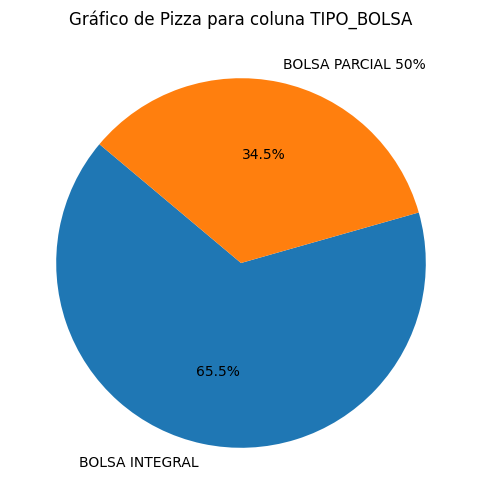

In [ ]:
categorias = ['BOLSA INTEGRAL', 'BOLSA PARCIAL 50%']
valores = [155041, 81595]

# Crie o gráfico de pizza
plt.figure(figsize=(6, 6))  # Define o tamanho do gráfico
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140)

# Adicione um título
plt.title('Gráfico de Pizza para coluna TIPO_BOLSA')

# Mostre o gráfico
plt.show()

Gráfico de Pizza da Coluna TIPO_BOLSA


*   Houve uma preferência dos canditados para o tipo de Bolsa Integral, com 65,5%.

*   Sendo assim com menor preferência dos canditados foi escolhido a bolsa Parcial 50%, com 34,5%.

*   Podemos enteder que grande parte dos canditados conseguiram uma nota suficiente para o preenchimento das bolsas intergrais e que aqueles que não coneguiram essse feito optou pela bolsa parcial.


In [ ]:
contagem_sexo = data['SEXO_BENEFICIARIO_BOLSA'].value_counts()
print(contagem_sexo)

# Acessar a quantidade de um sexo específico
quantidade_masculino = contagem_sexo['M']
quantidade_feminino = contagem_sexo['F']

F    128976
M    107660
Name: SEXO_BENEFICIARIO_BOLSA, dtype: int64


Contagem de Sexo:

* Estamos contando a quantidade de ocorrências para cada categoria de sexo ('M' para masculino e 'F' para feminino).
Acesso à Quantidade por Sexo:

* Acessando a quantidade de benefícios para cada sexo, tanto masculino ('M') quanto feminino ('F').

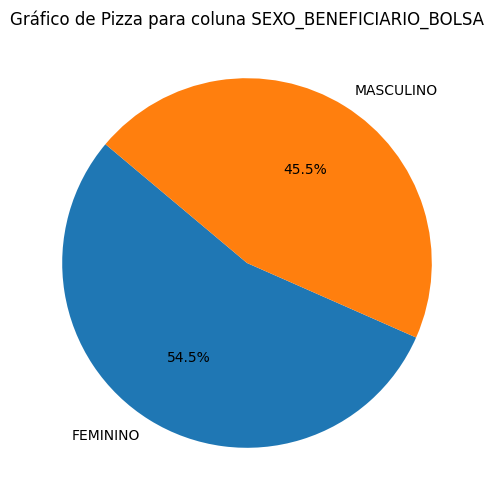

In [ ]:
categorias = ['FEMININO', 'MASCULINO']
valores = [128976, 107660]

# Crie o gráfico de pizza
plt.figure(figsize=(6, 6))  # Define o tamanho do gráfico
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140)

# Adicione um título
plt.title('Gráfico de Pizza para coluna SEXO_BENEFICIARIO_BOLSA')

# Mostre o gráfico
plt.show()

Preparação dos Dados:

* Estamos preparando os dados para o gráfico de pizza, com duas categorias ('FEMININO' e 'MASCULINO') e seus respectivos valores.
Criação do Gráfico de Pizza:

* Criando um gráfico de pizza para mostrar a proporção de cada categoria em relação ao todo.

*   É possível permeceber que houve um número maior canditados do sexo feminino, com representação de 54.5%.

*   A quantidade de canditados homens embora inferior não fica para trás, com representação de 45,5%



In [ ]:
from scipy.stats import chi2_contingency

# Carregar o Dataset
data = pd.read_csv('/content/pda-prouni-2017 - pda-prouni-2017.csv')

# Criar a tabela de contingência
contingency_table = pd.crosstab(data['RACA_BENEFICIARIO_BOLSA'], data['NOME_CURSO_BOLSA'])

# Calcular o teste qui-quadrado
chi2, p_val, dof, expected = chi2_contingency(contingency_table.values)

# Exibir os resultados
print('Tabela de Contingência:')
print(contingency_table)
print('\nResultado do Teste Qui-Quadrado:')
print('Qui-Quadrado:', chi2)
print('Valor p:', p_val)

Tabela de Contingência:
NOME_CURSO_BOLSA         Administraçao  Administração  Administração (Abc)  \
RACA_BENEFICIARIO_BOLSA                                                      
Amarela                              0            334                    0   
Branca                               5           6760                    5   
Indígena                             0             10                    0   
Não Informada                        0              0                    0   
Parda                               12           7908                    1   
Preta                                3           2209                    1   

NOME_CURSO_BOLSA         Administração (Barreiro)  Administração (Ead)  \
RACA_BENEFICIARIO_BOLSA                                                  
Amarela                                         0                    5   
Branca                                         11                  150   
Indígena                                        0      

Carregamento do Dataset:

* É carregando um conjunto de dados no pandas.

Criação da Tabela de Contingência:

* Criando uma tabela de contingência cruzando duas variáveis: 'RACA_BENEFICIARIO_BOLSA' e 'NOME_CURSO_BOLSA'.

Cálculo do Teste Qui-Quadrado:

* Estamos calculando o teste qui-quadrado para avaliar a independência entre as variáveis na tabela de contingência.

Exibição dos Resultados:

* É exibindo a tabela de contingência e os resultados do teste qui-quadrado.

Relações entre SEXO_BENEFICIARIO_BOLSA e TIPO_BOLSA:
  SEXO_BENEFICIARIO_BOLSA         TIPO_BOLSA  Contagem
0                       F     BOLSA INTEGRAL     84346
1                       F  BOLSA PARCIAL 50%     44630
2                       M     BOLSA INTEGRAL     70695
3                       M  BOLSA PARCIAL 50%     36965


<ipython-input-29-45c95b74bb56>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(sexos))


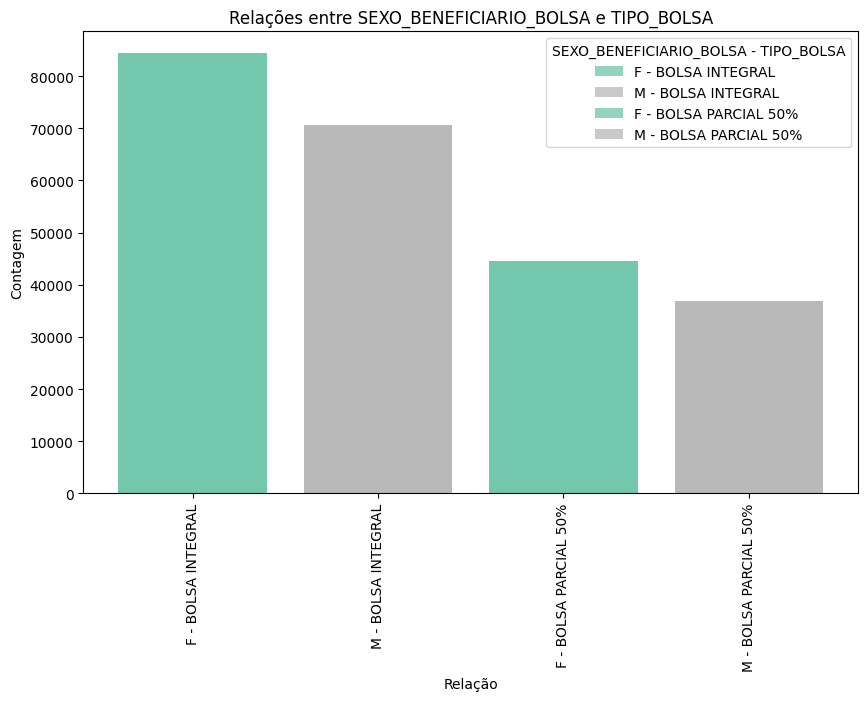

In [ ]:
relacoes = data.groupby(['SEXO_BENEFICIARIO_BOLSA', 'TIPO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre SEXO_BENEFICIARIO_BOLSA e TIPO_BOLSA:")
print(relacoes)

plt.figure(figsize=(10, 6))
relacoes = relacoes.sort_values(by=['SEXO_BENEFICIARIO_BOLSA', 'TIPO_BOLSA'])

# Obtenha as categorias únicas de SEXO_BENEFICIARIO_BOLSA
sexos = relacoes['SEXO_BENEFICIARIO_BOLSA'].unique()

# Defina cores diferentes para cada sexo usando a paleta 'Set2'
colors = plt.cm.get_cmap('Set2', len(sexos))

for i, (sexo, data_sexo) in enumerate(relacoes.groupby('TIPO_BOLSA')):
    for j, genero in enumerate(data_sexo['SEXO_BENEFICIARIO_BOLSA']):
        plt.bar(genero + ' - ' + data_sexo['TIPO_BOLSA'],
                data_sexo[data_sexo['SEXO_BENEFICIARIO_BOLSA'] == genero]['Contagem'],
                color=colors(j),
                label=f"{genero} - {sexo}", alpha=0.7)

plt.title('Relações entre SEXO_BENEFICIARIO_BOLSA e TIPO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='SEXO_BENEFICIARIO_BOLSA - TIPO_BOLSA')
plt.show()



Visualizando o Gráfico de Barras podemos perceber que:



*   Para a modalidade de Bolsa Integral o sexo feminino tem uma vantagem, cerca de 13651.

*   Para a modalidade de Bolsa Parcial 50% o sexo feminino tem uma leve vantagem, cerca de 7665.

*   Esse gráfico mostra que os candidatos do sexo feminino se sobressaem a frente dos candidatos masculinos tanto para a bolsa integral quanto para bolsa parcial.









Gráfico de Pizza para a coluna NOME_TURNO_CURSO_BOLSA


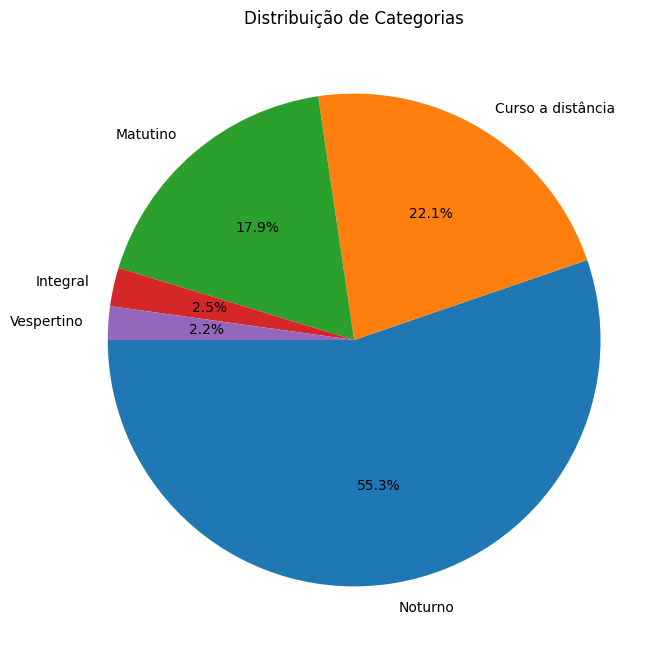

In [ ]:
print('Gráfico de Pizza para a coluna NOME_TURNO_CURSO_BOLSA')
contagem_categorias = data['NOME_TURNO_CURSO_BOLSA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=180, labeldistance=1.1)
plt.title("Distribuição de Categorias")
plt.show()


Visualizando o Gráfico de Pizza podemos perceber que:

*   Há preferência para o horário Noturno, visto que 55.3% foi a escolha dos candidatos. Pode-se entender que essa canditados trabalham durante o dia.

*   Logo em seguida a escolha com maior valor foi o Curso a Distânica com 22.1%.

*   Matutino foi o terceiro maior horário escolhido com 17.9%. Entendemos que são canditatos já aconstumados com essa rotina e visam um estágio no horário Vespertino.

*   Para os horários Integral e Vespertino a preferência foi bem abaixo, sendo 2,5% e 2.2%.




Gráfico de Pizza para a coluna RACA_BENEFICIARIO_BOLSA


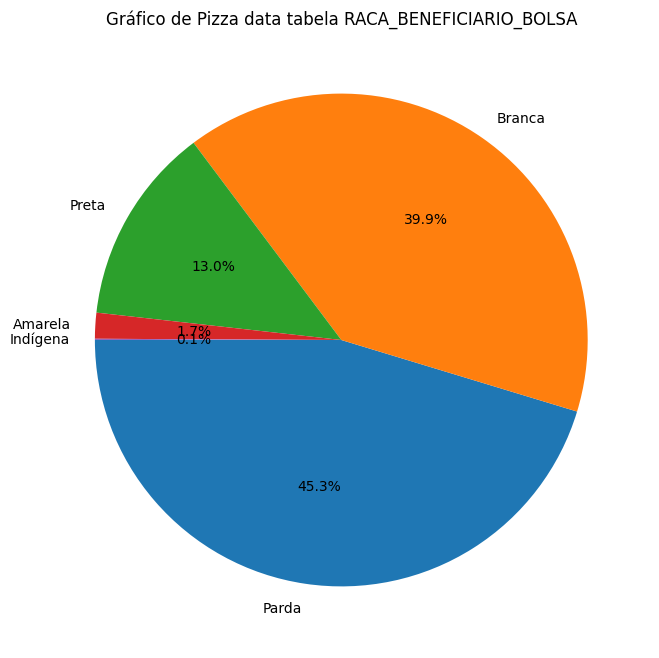

In [ ]:
print('Gráfico de Pizza para a coluna RACA_BENEFICIARIO_BOLSA')
valor_a_excluir = 'Não Informada'

data_filtrado = data[data['RACA_BENEFICIARIO_BOLSA'] != valor_a_excluir]

contagem_categorias = data_filtrado['RACA_BENEFICIARIO_BOLSA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=180, labeldistance=1.1)
plt.title('Gráfico de Pizza data tabela RACA_BENEFICIARIO_BOLSA')
plt.show()

Visualizando o Gráfico de Pizza podemos perceber que:

*   Há uma predominânia de canditados Pardos e Brancos, sendo em ordem 45.3% e 39.9%.

*   Para os grupos menos priveligados encontramos uma baixa de canditados. Sendo 13% para candidatos Pretos, 1.7% para Amarelos e 0.1% para Indígenas.



Relações entre RACA_BENEFICIARIO_BOLSA e TIPO_BOLSA:
   RACA_BENEFICIARIO_BOLSA         TIPO_BOLSA  Contagem
0                  Amarela     BOLSA INTEGRAL      2199
1                  Amarela  BOLSA PARCIAL 50%      1805
2                   Branca     BOLSA INTEGRAL     62701
3                   Branca  BOLSA PARCIAL 50%     31771
4                 Indígena     BOLSA INTEGRAL       138
5                 Indígena  BOLSA PARCIAL 50%        53
6            Não Informada     BOLSA INTEGRAL        13
7                    Parda     BOLSA INTEGRAL     69769
8                    Parda  BOLSA PARCIAL 50%     37446
9                    Preta     BOLSA INTEGRAL     20221
10                   Preta  BOLSA PARCIAL 50%     10520


<ipython-input-28-d6d854c078fe>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(racas))


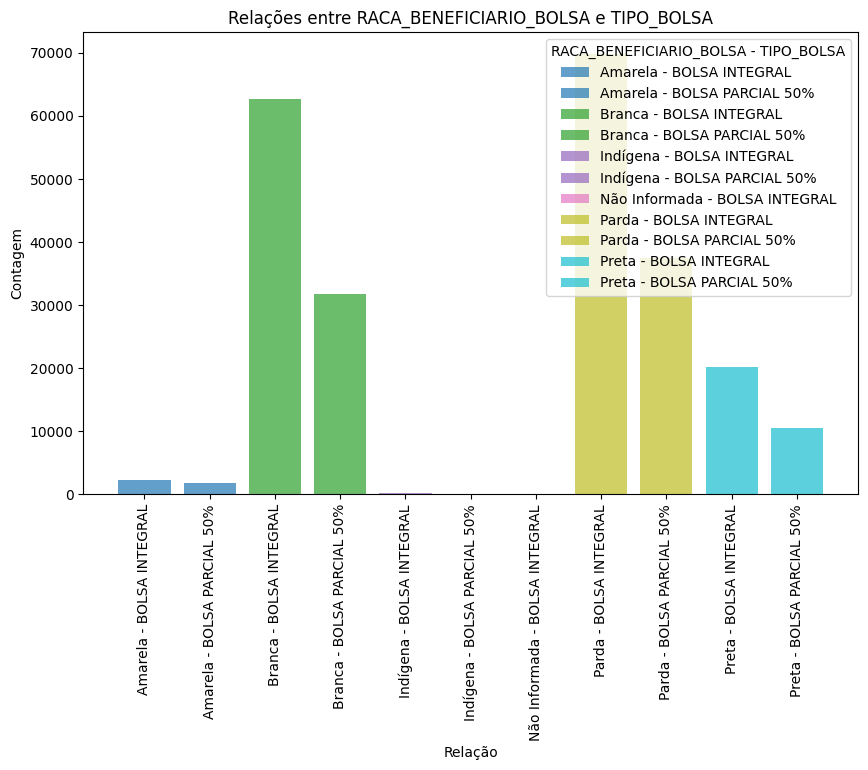

In [ ]:
relacoes = data.groupby(['RACA_BENEFICIARIO_BOLSA', 'TIPO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre RACA_BENEFICIARIO_BOLSA e TIPO_BOLSA:")
print(relacoes)

plt.figure(figsize=(10, 6))
relacoes = relacoes.sort_values(by=['RACA_BENEFICIARIO_BOLSA', 'TIPO_BOLSA'])

# Obtenha as categorias únicas de RACA_BENEFICIARIO_BOLSA
racas = relacoes['RACA_BENEFICIARIO_BOLSA'].unique()

# Defina cores diferentes para cada raça usando a paleta 'tab10'
colors = plt.cm.get_cmap('tab10', len(racas))

for i, (raca, data_raca) in enumerate(relacoes.groupby('RACA_BENEFICIARIO_BOLSA')):
    for j, tipo_bolsa in enumerate(data_raca['TIPO_BOLSA']):
        plt.bar(raca + ' - ' + tipo_bolsa,
                data_raca[data_raca['TIPO_BOLSA'] == tipo_bolsa]['Contagem'],
                color=colors(i),
                label=f"{raca} - {tipo_bolsa}", alpha=0.7)

plt.title('Relações entre RACA_BENEFICIARIO_BOLSA e TIPO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='RACA_BENEFICIARIO_BOLSA - TIPO_BOLSA')
plt.show()


Relações entre RACA_BENEFICIARIO_BOLSA e TIPO_BOLSA:

*   Através de uma análise minunciosa, podemos perceber que ambas as raças Parda e Branca prevalecem a frente nas bolsa Integral e Parcial.

*   Para os canditados denominados de raça preta, podemos perceber que há uma discrepância em relação a quantidade de tipo de bolsa. Mesmo para integral e parcial ambos ficam absurdamente atrás em valores.



Relações entre SEXO_BENEFICIARIO_BOLSA e RACA_BENEFICIARIO_BOLSA:
   SEXO_BENEFICIARIO_BOLSA RACA_BENEFICIARIO_BOLSA  Contagem
0                        F                 Amarela      2480
1                        F                  Branca     52591
2                        F                Indígena        97
3                        F           Não Informada         4
4                        F                   Parda     57852
5                        F                   Preta     15952
6                        M                 Amarela      1524
7                        M                  Branca     41881
8                        M                Indígena        94
9                        M           Não Informada         9
10                       M                   Parda     49363
11                       M                   Preta     14789


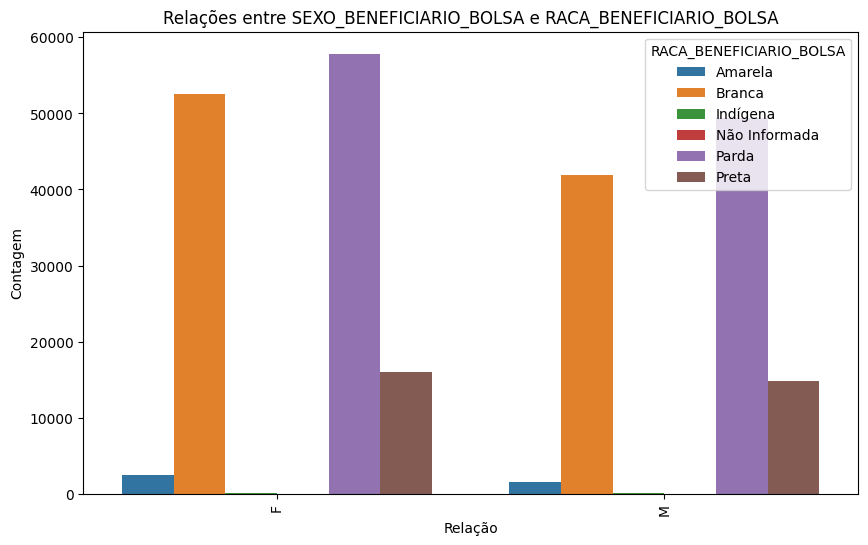

In [ ]:
relacoes = data.groupby(['SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre SEXO_BENEFICIARIO_BOLSA e RACA_BENEFICIARIO_BOLSA:")
print(relacoes)

plt.figure(figsize=(10, 6))

# Use o Seaborn para criar o gráfico de barras com o parâmetro 'hue'
sns.barplot(data=relacoes, x='SEXO_BENEFICIARIO_BOLSA', y='Contagem', hue='RACA_BENEFICIARIO_BOLSA')

plt.title('Relações entre SEXO_BENEFICIARIO_BOLSA e RACA_BENEFICIARIO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')

plt.xticks(rotation=90)  # Rotação dos rótulos no eixo x para facilitar a leitura

plt.show()



Relações entre SEXO_BENEFICIARIO_BOLSA e RACA_BENEFICIARIO_BOLSA:


*   Nesse gráfico podemos perceber que a maior quantidade de candidatos mulheres e homens são de raça Branca e Parda.

*   É imprescindível notar poucos canditados homens e mulheres de raça preta passaram nesse vestibular. Isso pode ser uma questão social ou financeira, visto que poucos conseguiram essa a vaga.



Relações entre SEXO_BENEFICIARIO_BOLSA e REGIAO_BENEFICIARIO_BOLSA:
  SEXO_BENEFICIARIO_BOLSA REGIAO_BENEFICIARIO_BOLSA  Contagem
0                       F              Centro-Oeste     11525
1                       F                  Nordeste     26073
2                       F                     Norte      9015
3                       F                   Sudeste     57081
4                       F                       Sul     25282
5                       M              Centro-Oeste      8769
6                       M                  Nordeste     23140
7                       M                     Norte      7759
8                       M                   Sudeste     48024
9                       M                       Sul     19968


<ipython-input-32-2a7c86f9176b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(sexos) * len(regioes))


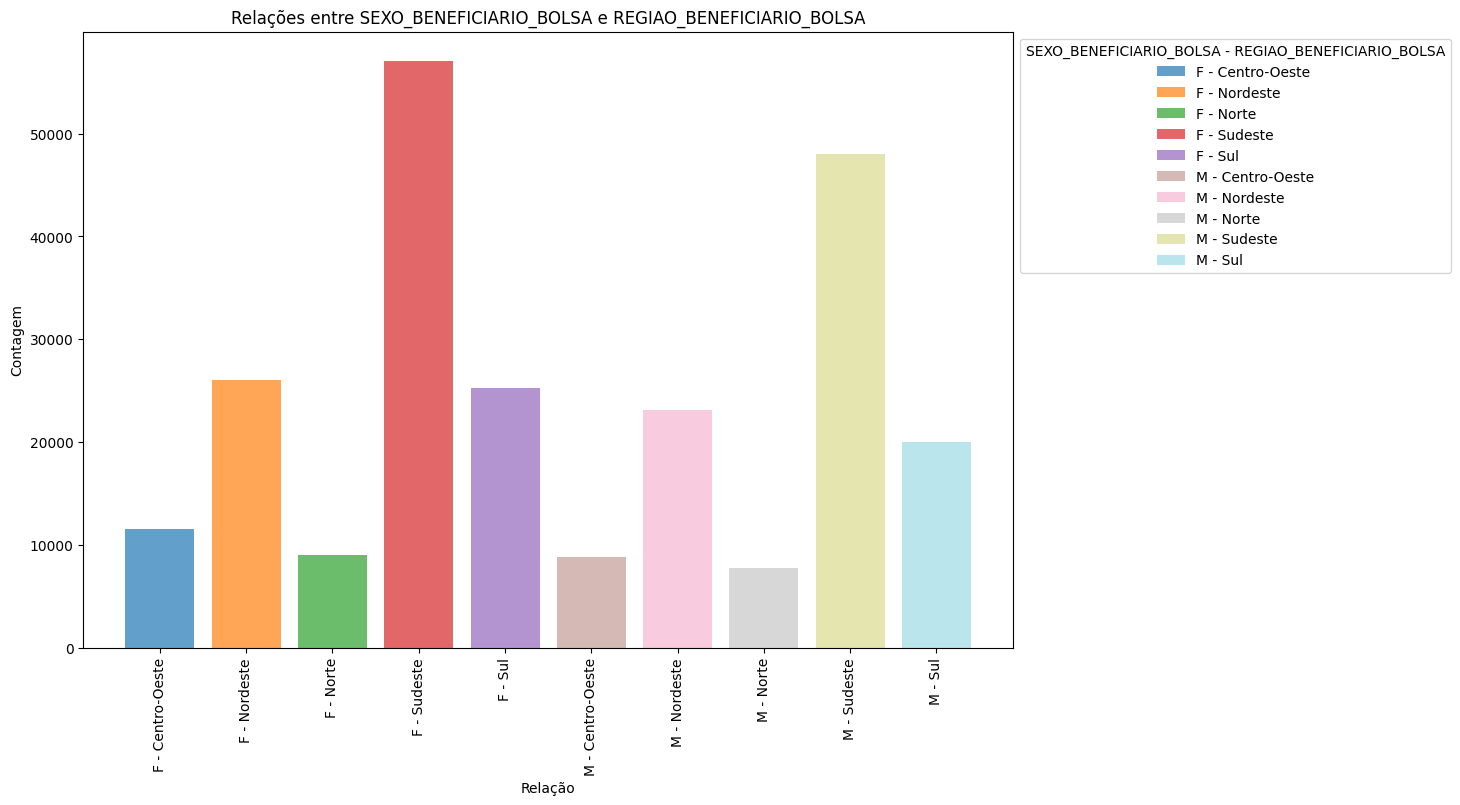

In [ ]:
relacoes = data.groupby(['SEXO_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre SEXO_BENEFICIARIO_BOLSA e REGIAO_BENEFICIARIO_BOLSA:")
print(relacoes)

plt.figure(figsize=(12, 8))
relacoes = relacoes.sort_values(by=['SEXO_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA'])

# Obtenha as categorias únicas de SEXO_BENEFICIARIO_BOLSA e REGIAO_BENEFICIARIO_BOLSA
sexos = relacoes['SEXO_BENEFICIARIO_BOLSA'].unique()
regioes = relacoes['REGIAO_BENEFICIARIO_BOLSA'].unique()

# Defina cores diferentes para cada combinação de sexo e região usando a paleta 'tab20'
colors = plt.cm.get_cmap('tab20', len(sexos) * len(regioes))

for i, (sexo, data_sexo) in enumerate(relacoes.groupby('SEXO_BENEFICIARIO_BOLSA')):
    for j, regiao in enumerate(data_sexo['REGIAO_BENEFICIARIO_BOLSA']):
        plt.bar(sexo + ' - ' + regiao,
                data_sexo[data_sexo['REGIAO_BENEFICIARIO_BOLSA'] == regiao]['Contagem'],
                color=colors(i * len(regioes) + j),
                label=f"{sexo} - {regiao}", alpha=0.7)

plt.title('Relações entre SEXO_BENEFICIARIO_BOLSA e REGIAO_BENEFICIARIO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='SEXO_BENEFICIARIO_BOLSA - REGIAO_BENEFICIARIO_BOLSA', bbox_to_anchor=(1, 1))
plt.show()


Relações entre SEXO_BENEFICIARIO_BOLSA e REGIAO_BENEFICIARIO_BOLSA:

*   Foi percebido que a maior quantidade de canditados estão centralizados na região sudeste, visto juntos têm 105.105.

*   Para as regiões do Centro-Oeste e Norte percebemos que há uma baixa na quantidades de candidatos, compondo apenas 37.068.

*   Algo que nos chamou atenção foi os números próximos para os canditados da região Nordeste e Sul.






Gráfico de Pizza para a coluna REGIAO_BENEFICIARIO_BOLSA


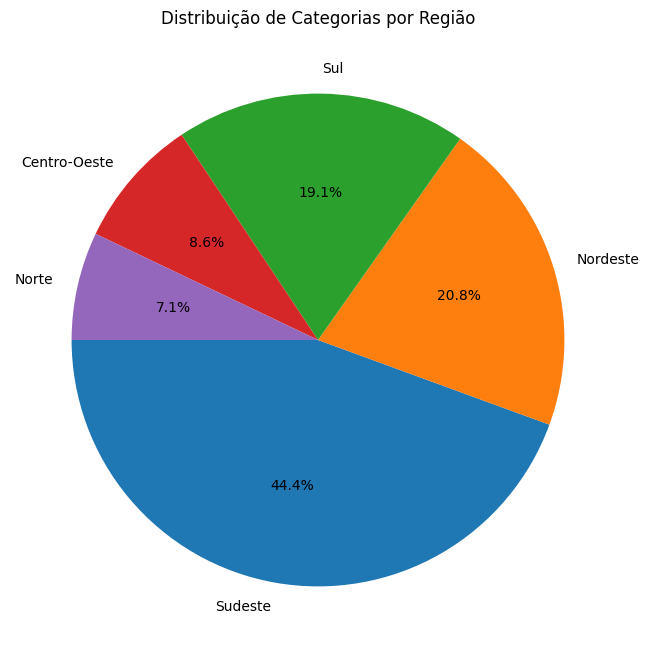

In [ ]:
print('Gráfico de Pizza para a coluna REGIAO_BENEFICIARIO_BOLSA')
contagem_categorias = data['REGIAO_BENEFICIARIO_BOLSA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=180, labeldistance=1.1)
plt.title("Distribuição de Categorias por Região")
plt.show()

Gráfico de Pizza para a coluna REGIAO_BENEFICIARIO_BOLSA

*   Neste gráfico foi percebido que a maior parte dos candidatos estão na região Sudeste.

*   O nordeste fica em segundo lugar com 20.8% dos candidatos e logo após a região sul com 19.1%.

*   O centro-oeste e norte ficam ao final com a soma dos dois sendo inferior a quantidade de candidatos do sul.






Relações entre RACA_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:
   RACA_BENEFICIARIO_BOLSA NOME_TURNO_CURSO_BOLSA  Contagem
0                  Amarela      Curso a distância       768
1                  Amarela               Integral        98
2                  Amarela               Matutino       794
3                  Amarela                Noturno      2251
4                  Amarela             Vespertino        93
5                   Branca      Curso a distância     19086
6                   Branca               Integral      2987
7                   Branca               Matutino     15787
8                   Branca                Noturno     55113
9                   Branca             Vespertino      1499
10                Indígena      Curso a distância        83
11                Indígena               Integral         9
12                Indígena               Matutino        30
13                Indígena                Noturno        63
14                Indígena         

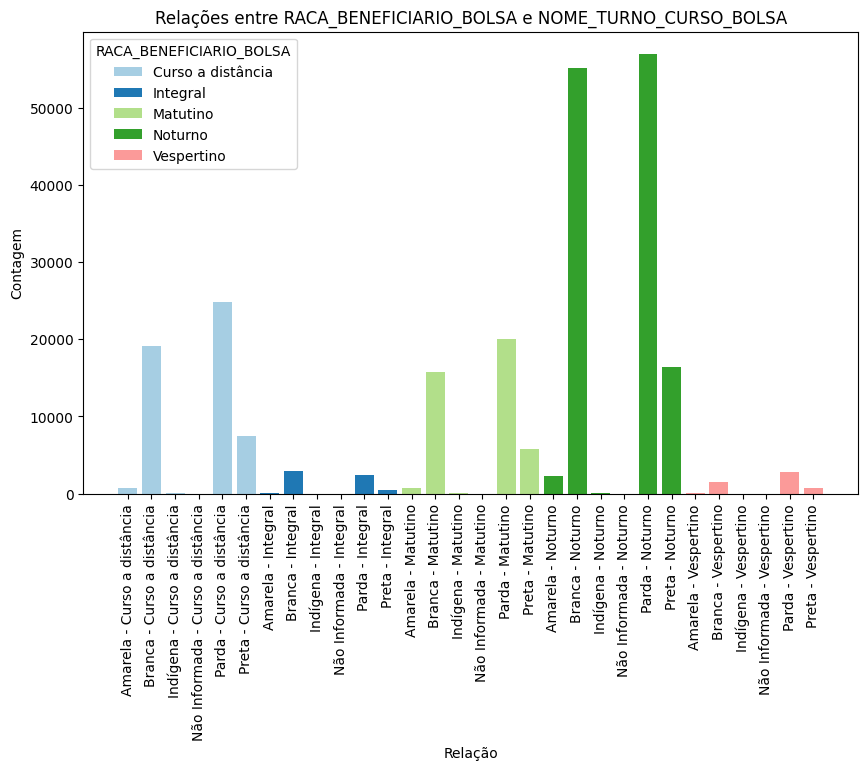

In [ ]:
relacoes = data.groupby(['RACA_BENEFICIARIO_BOLSA', 'NOME_TURNO_CURSO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre RACA_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:")
print(relacoes)

plt.figure(figsize=(10, 6))
relacoes = relacoes.sort_values(by=['RACA_BENEFICIARIO_BOLSA', 'NOME_TURNO_CURSO_BOLSA'])
colors = plt.cm.Paired(range(len(relacoes['RACA_BENEFICIARIO_BOLSA'].unique())))
for i, (raca, data_raca) in enumerate(relacoes.groupby('NOME_TURNO_CURSO_BOLSA')):
    plt.bar(data_raca['RACA_BENEFICIARIO_BOLSA'] + ' - ' + data_raca['NOME_TURNO_CURSO_BOLSA'],
            data_raca['Contagem'],
            color=colors[i],
            label=raca)

plt.title('Relações entre RACA_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='RACA_BENEFICIARIO_BOLSA')
plt.show()

Relações entre RACA_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:

*   Neste gráfico podemos perceber que os candidatos de raça branca e parta tiveram a preferência e dominância no horário noturno.
*   Nos outros turnos também houve essa predominânica de pessoas de raça branca e parta porém um pouco menor comparado ao horário noturno.

*  Existe essa tendência visto que a maioria das vagas foram preenchidas por pessoas de raça branca e parda.






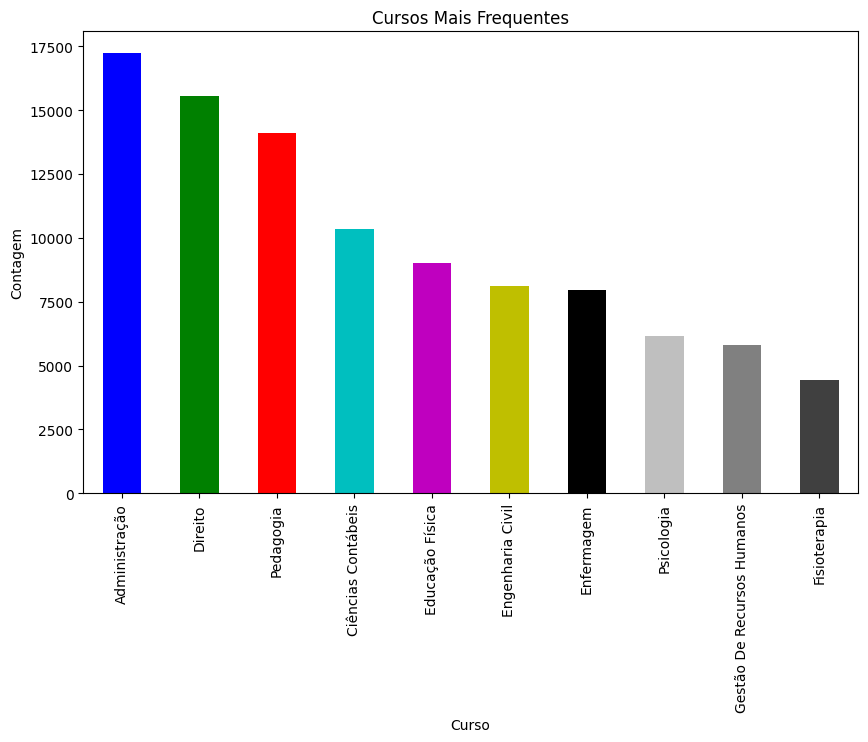

In [ ]:
frequencia_cursos = data['NOME_CURSO_BOLSA'].value_counts()

# Passo 2: Selecionar os X cursos mais frequentes (por exemplo, os 10 cursos mais frequentes)
cursos_mais_frequentes = frequencia_cursos.head(10)

# Passo 3: Criar um gráfico de barras
plt.figure(figsize=(10, 6))
cursos_mais_frequentes.plot(kind='bar', color=['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', '0.5', '0.25'])
plt.title('Cursos Mais Frequentes')
plt.xlabel('Curso')
plt.ylabel('Contagem')

plt.xticks(rotation=90)  # Rotação dos rótulos no eixo x para facilitar a leitura

plt.show()

Cursos

*   Esse gráfico plotado tem apenas os 10 cursos mais escolhidos entre os canditados.
*   É possível perceber entres eles que o curso de Administração sai a frente com quase 17.500 de candidatos e que o curso de fisioterapia segue ao final com um pouco mais de 5000 candidatos.



Essa gráfico foi realizado com base os cursos mais frequentes de nossa Base de Dados. Visto que a mesma possui um grande número de cursos trouxemos a frequência dos que mais aparecem para uma visualização.

Relações entre SEXO_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:
  SEXO_BENEFICIARIO_BOLSA NOME_TURNO_CURSO_BOLSA  Contagem
0                       F      Curso a distância     31056
1                       F               Integral      3585
2                       F               Matutino     25484
3                       F                Noturno     65604
4                       F             Vespertino      3247
5                       M      Curso a distância     21183
6                       M               Integral      2397
7                       M               Matutino     16965
8                       M                Noturno     65162
9                       M             Vespertino      1953


<ipython-input-33-e3cc1294fa12>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(sexos) * len(turnos))


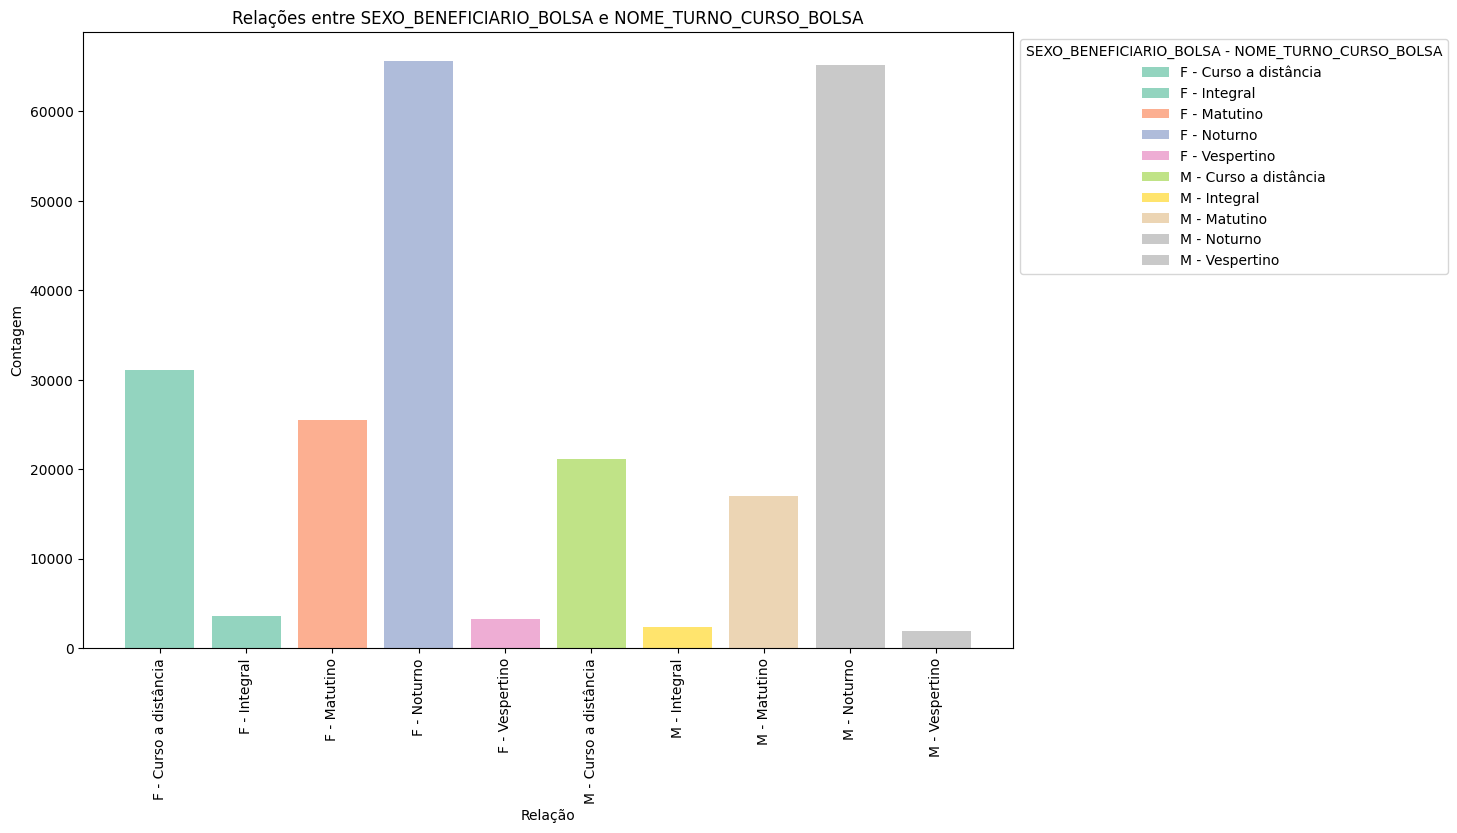

In [ ]:
relacoes = data.groupby(['SEXO_BENEFICIARIO_BOLSA', 'NOME_TURNO_CURSO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre SEXO_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:")
print(relacoes)

plt.figure(figsize=(12, 8))
relacoes = relacoes.sort_values(by=['SEXO_BENEFICIARIO_BOLSA', 'NOME_TURNO_CURSO_BOLSA'])

# Obtenha as categorias únicas de SEXO_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA
sexos = relacoes['SEXO_BENEFICIARIO_BOLSA'].unique()
turnos = relacoes['NOME_TURNO_CURSO_BOLSA'].unique()

# Defina cores diferentes para cada combinação de sexo e turno usando a paleta 'Set2'
colors = plt.cm.get_cmap('Set2', len(sexos) * len(turnos))

for i, (sexo, data_sexo) in enumerate(relacoes.groupby('SEXO_BENEFICIARIO_BOLSA')):
    for j, turno in enumerate(data_sexo['NOME_TURNO_CURSO_BOLSA']):
        plt.bar(sexo + ' - ' + turno,
                data_sexo[data_sexo['NOME_TURNO_CURSO_BOLSA'] == turno]['Contagem'],
                color=colors(i * len(turnos) + j),
                label=f"{sexo} - {turno}", alpha=0.7)

plt.title('Relações entre SEXO_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='SEXO_BENEFICIARIO_BOLSA - NOME_TURNO_CURSO_BOLSA', bbox_to_anchor=(1, 1))
plt.show()


Relações entre SEXO_BENEFICIARIO_BOLSA e NOME_TURNO_CURSO_BOLSA:

*   É percebido que ambos os sexos tiveram a preferência na escolha do curso Nortuno. Essa escolha pode ser definida por um fator, sendo ele: trabalhar durante os perído matutino e vespertino.

*   Cerca de 52.000 pessoas de ambos os sexos tiveram a preferência pelo curso a distânia. Podemos supor que essa escolha também pode levar em consideração a um vinculo empregatíco, visto que os cursos a distância não tem um horário expecífico para seu aprendizado.

*   É percebido também que cerca de 41.000 candidatos de ambos os sexos optaram pelo curso matutino. Podemos enteder que ambos podem ser recém terceiranistas e estão acostumados com o horário da manhã.

*   Os cursos vespertinos e integral é o que nós vemos menos preferência. É possível entender que esses dois turnos podem atrapalhar os canditados que assim querem realizar algo pessoal durante o dia ou até mesmo trabalhar.





Relações entre SEXO_BENEFICIARIO_BOLSA e MODALIDADE_ENSINO_BOLSA:
  SEXO_BENEFICIARIO_BOLSA MODALIDADE_ENSINO_BOLSA  Contagem
0                       F                     EAD     31056
1                       F              Presencial     97920
2                       M                     EAD     21183
3                       M              Presencial     86477


<ipython-input-34-d24c7a35df06>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(sexos))


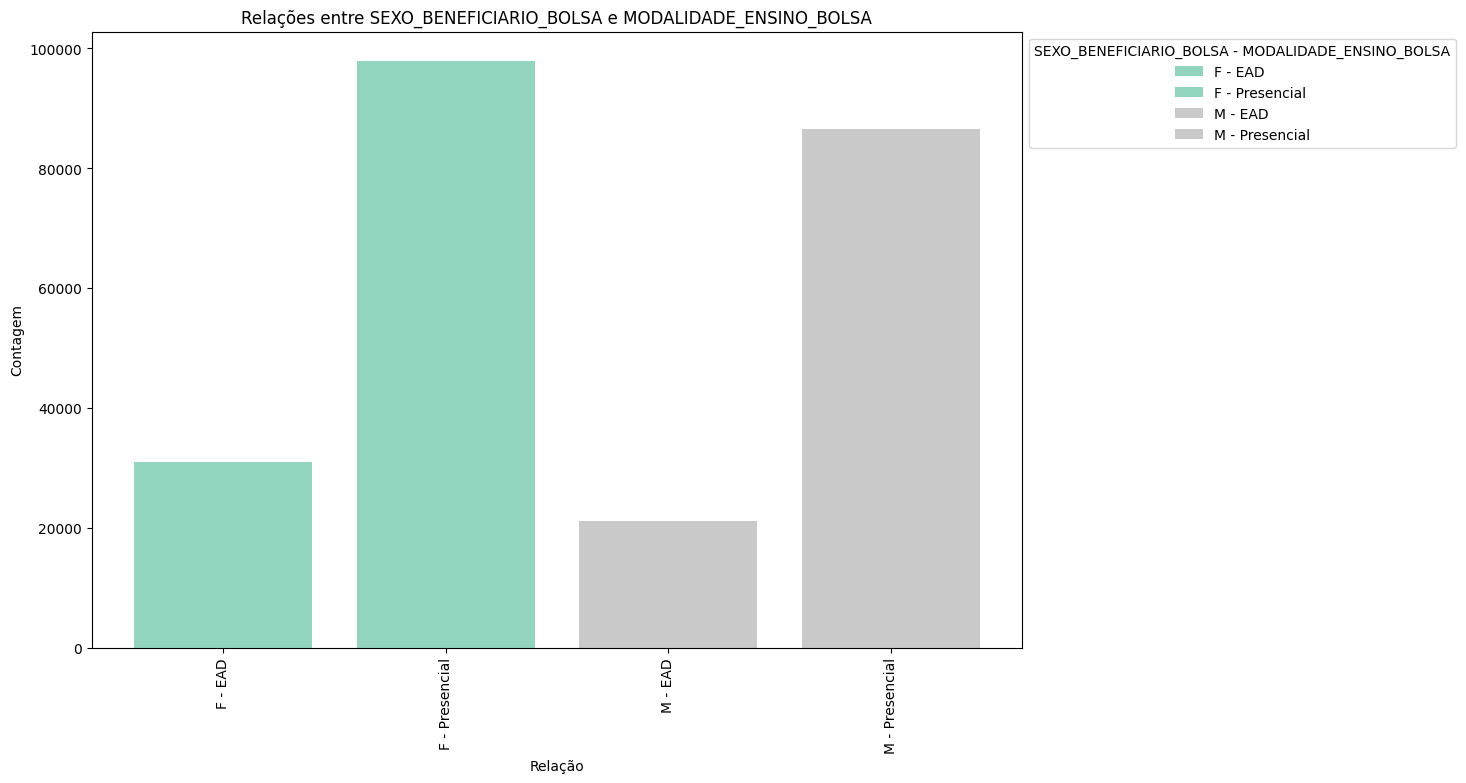

In [ ]:
relacoes = data.groupby(['SEXO_BENEFICIARIO_BOLSA', 'MODALIDADE_ENSINO_BOLSA']).size().reset_index(name='Contagem')

# Imprima o DataFrame de relações ou faça qualquer análise adicional necessária
print("Relações entre SEXO_BENEFICIARIO_BOLSA e MODALIDADE_ENSINO_BOLSA:")
print(relacoes)

plt.figure(figsize=(12, 8))
relacoes = relacoes.sort_values(by=['SEXO_BENEFICIARIO_BOLSA', 'MODALIDADE_ENSINO_BOLSA'])

# Obtenha as categorias únicas de SEXO_BENEFICIARIO_BOLSA
sexos = relacoes['SEXO_BENEFICIARIO_BOLSA'].unique()

# Defina cores diferentes para cada sexo usando a paleta 'Set2'
colors = plt.cm.get_cmap('Set2', len(sexos))

for i, (sexo, data_sexo) in enumerate(relacoes.groupby('SEXO_BENEFICIARIO_BOLSA')):
    for j, modalidade in enumerate(data_sexo['MODALIDADE_ENSINO_BOLSA']):
        plt.bar(sexo + ' - ' + modalidade,
                data_sexo[data_sexo['MODALIDADE_ENSINO_BOLSA'] == modalidade]['Contagem'],
                color=colors(i),
                label=f"{sexo} - {modalidade}", alpha=0.7)

plt.title('Relações entre SEXO_BENEFICIARIO_BOLSA e MODALIDADE_ENSINO_BOLSA')
plt.xlabel('Relação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='SEXO_BENEFICIARIO_BOLSA - MODALIDADE_ENSINO_BOLSA', bbox_to_anchor=(1, 1))
plt.show()


Relações entre SEXO_BENEFICIARIO_BOLSA e MODALIDADE_ENSINO_BOLSA:

*   Neste gráfico podemos perceber que há uma grande preferência por ambos os sexos na Modalidade Presencial e pouco preferência para EAD.
*   Podemos supor que poucos candidatos escolhem a modalidade EAD, seja por preferência mesmo ou não se adapatar a esse modelo onde basicamente que coordena o aprendizado é o próprio candidato.



As principais dificuldades encontradas durante o projeto estiveram relacionadas à instabilidade da base de dados, que apresentou problemas nas máquinas de alguns integrantes do grupo. Além disso, enfrentamos desafios ao tentar criar o gráfico de dispersão, pois nossa base de dados continha principalmente variáveis categóricas. Isso tornou complicado gerar um gráfico detalhado e informativo, já que os dados não eram numéricos. Sendo assim, optamos por tirar de nossa análise.

Outro obstáculo significativo surgiu ao tentar visualizar os outliers. O tipo de dados que estávamos utilizando, muitas vezes, não era apropriado para identificar outliers de forma clara. Consequentemente, o gráfico gerado não ficou tão apresentável quanto gostaríamos, dificultando a interpretação dos resultados.

Essas dificuldades nos ensinaram a importância da preparação cuidadosa dos dados antes da análise. Entendemos que é crucial compreender a natureza dos dados que estamos manipulando para escolher as técnicas e visualizações adequadas. Além disso, aprendemos que, em projetos futuros, é essencial garantir a consistência e a qualidade dos dados desde o início, a fim de facilitar análises mais precisas e significativas.

Além das dificuldades mencionadas anteriormente, enfrentamos desafios específicos ao tentar criar o gráfico de violino (violin plot). O violin plot é uma visualização poderosa para entender a distribuição dos dados, especialmente em variáveis categóricas. No entanto, devido à complexidade da interpretação e ao formato das variáveis em nossa base de dados, a geração de violin plots detalhados foi mais complicada do que inicialmente previsto.